In [1]:
# data manipulation
# conda install -c conda-forge pandas
import pandas as pd
# conda install -c conda-forge numpy
import numpy as np
# conda install -c conda-forge openpyxl
import openpyxl
# conda install -c conda-forge missingno
import missingno as msno

# data visualisation
# conda install -c conda-forge matplotlib
import matplotlib.pyplot as plt
from matplotlib import rcParams
# conda install -c conda-forge seaborn
import seaborn as sns

# apply some cool styling
plt.style.use("ggplot")
rcParams['figure.figsize'] = (12,  6)

#  For showing all columns in Pandas
pd.set_option('display.max_columns', None)

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

ModuleNotFoundError: No module named 'google'

In [19]:
%cd /content/drive/My Drive/Omdena_Liverpool_Project/DATA/all_rtc_ds/Group 4 Data

/content/drive/.shortcut-targets-by-id/13C0hJDG3MCQB3jYvTCeWOeK3LQLLUZMA/Omdena_Liverpool_Project/DATA/all_rtc_ds/Group 4 Data


In [11]:
vehicle_df = pd.read_parquet("vehicle_data_no_impute.parquet")

In [13]:
vehicle_df.head()

,Accident_Index,Age_Band_of_Driver,Age_of_Vehicle,Driver_Home_Area_Type,Driver_IMD_Decile,Engine_Capacity_.CC.,Hit_Object_in_Carriageway,Hit_Object_off_Carriageway,Journey_Purpose_of_Driver,Junction_Location,make,model,Propulsion_Code,Sex_of_Driver,Skidding_and_Overturning,Towing_and_Articulation,Vehicle_Leaving_Carriageway,Vehicle_Location.Restricted_Lane,Vehicle_Manoeuvre,Vehicle_Reference,Vehicle_Type,Was_Vehicle_Left_Hand_Drive,X1st_Point_of_Impact,Year,Age_Band_of_Driver_missing,Age_of_Vehicle_missing,Driver_Home_Area_Type_missing,Driver_IMD_Decile_missing,Engine_Capacity_.CC._missing,Hit_Object_in_Carriageway_missing,Hit_Object_off_Carriageway_missing,Journey_Purpose_of_Driver_missing,Junction_Location_missing,make_missing,model_missing,Propulsion_Code_missing,Skidding_and_Overturning_missing,Was_Vehicle_Left_Hand_Drive_missing
0,200401BS00001,26 - 35,3.0,Urban area,4.0,1588.0,None,None,None,None,ROVER,45 CLASSIC 16V,Petrol,Male,None,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,2,109,None,Front,2004,False,False,False,False,False,True,True,True,True,False,False,False,True,True
1,200401BS00002,26 - 35,NaN,Urban area,3.0,NaN,None,None,None,None,BMW,C1,None,Male,None,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,1,109,None,Front,2004,False,True,False,False,True,True,True,True,True,False,False,True,True,True
2,200401BS00003,26 - 35,4.0,None,NaN,998.0,None,None,None,None,NISSAN,MICRA CELEBRATION 16V,Petrol,Male,None,No tow/articulation,Did not leave carriageway,0.0,Turning right,1,109,None,Front,2004,False,False,True,True,False,True,True,True,True,False,False,False,True,True
3,200401BS00003,66 - 75,NaN,None,NaN,NaN,None,None,None,None,LONDON TAXIS INT,TXII GOLD AUTO,None,Male,None,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,2,109,None,Front,2004,False,True,True,True,True,True,True,True,True,False,False,True,True,True
4,200401BS00004,26 - 35,1.0,Urban area,4.0,124.0,None,None,None,None,PIAGGIO,VESPA ET4,Petrol,Male,None,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,1,Motorcycle 125cc and under,None,Front,2004,False,False,False,False,False,True,True,True,True,False,False,False,True,True


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]), <a list of 18 Text major ticklabel objects>)

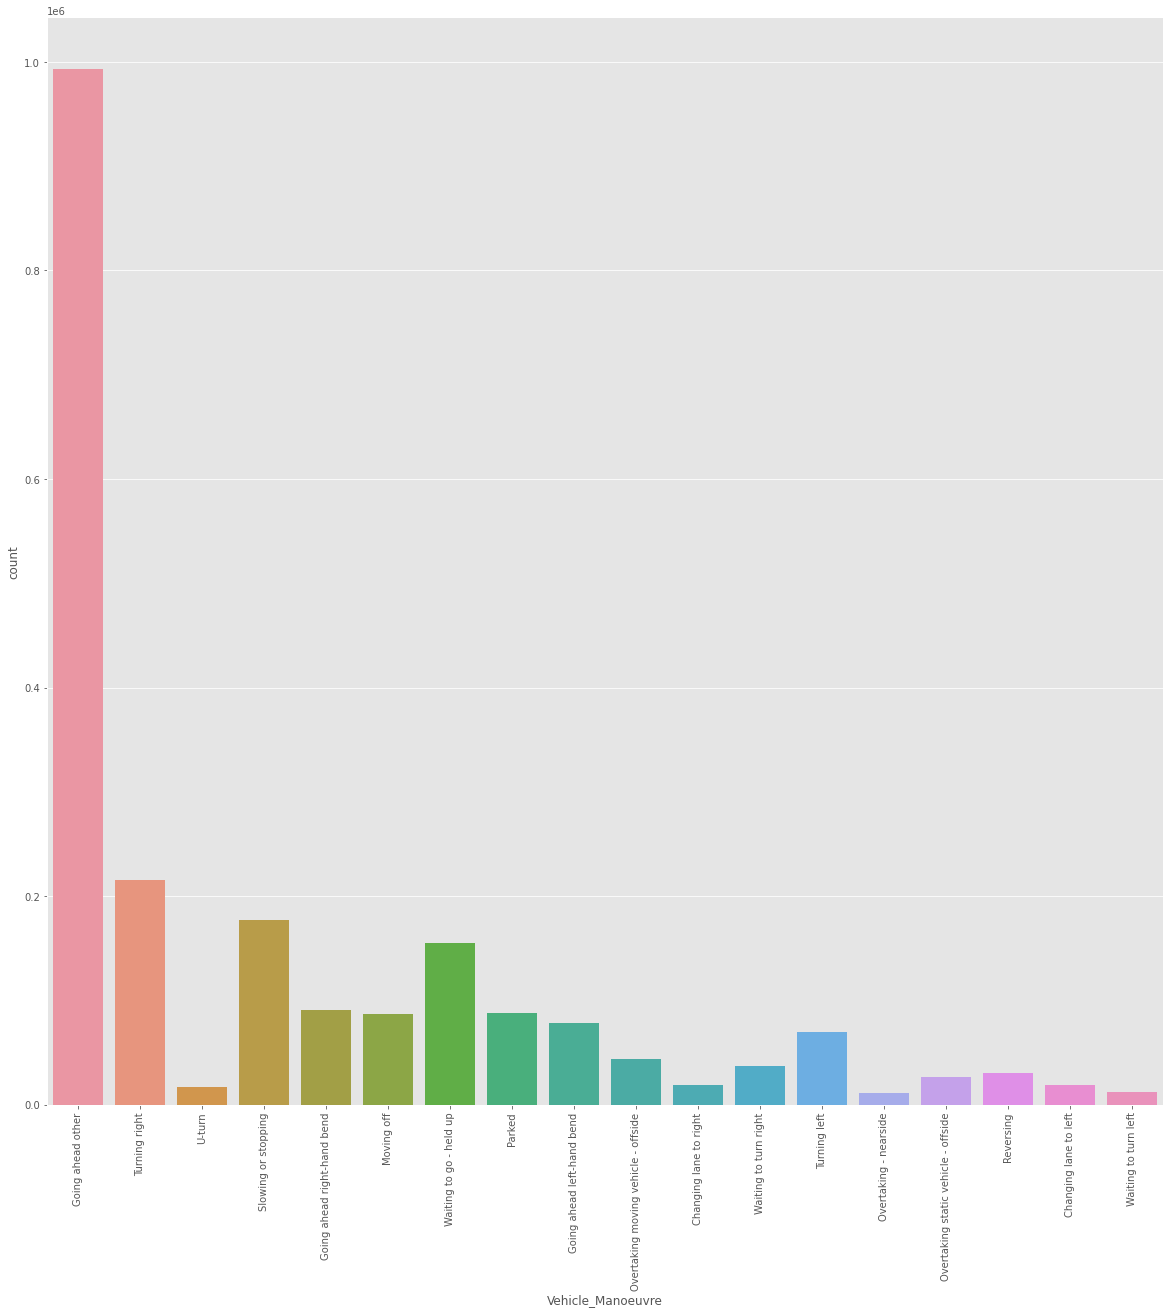

In [20]:
plt.figure(figsize=(20,20))
sns.countplot(x=vehicle_df['Vehicle_Manoeuvre'])
plt.xticks(rotation=90)

In [16]:
vehicle_df['Engine_Capacity_.CC.'].min()

1.0

<AxesSubplot:xlabel='Engine_Capacity_.CC.', ylabel='Count'>

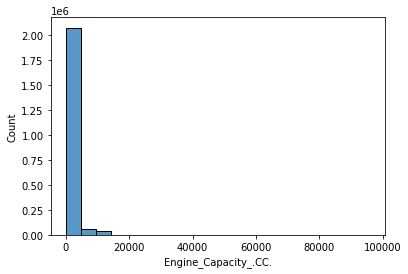

In [ ]:
# plt.figure(figsize=(20,20))
sns.histplot(vehicle_df['Engine_Capacity_.CC.'],bins=20)
# plt.yscale('log')
# plt.ylim()
# plt.xticks(rotation=90)

In [ ]:
(vehicle_df['make'].value_counts() / vehicle_df.shape[0]) * 100

VAUXHALL             16.055910
FORD                 10.897510
PEUGEOT               5.816755
VOLKSWAGEN            5.553119
RENAULT               5.253536
                       ...    
POCLAIN               0.000046
THINK                 0.000046
JORDAN                0.000046
KINGTON               0.000046
ERIK BUELL RACING     0.000046
Name: make, Length: 535, dtype: float64

In [ ]:
vehicle_df[vehicle_df['make']=='VAUXHALL']['Engine_Capacity_.CC.'].mean()

1749.132362928593

In [ ]:
vehicle_df.shape

(2172689, 39)

In [ ]:
vehicle_df.shape

(2172689, 39)

In [ ]:
vehicle_df.groupby(['make','model'])[['Accident_Index']].count()

Accident_Index
make   model                              
ABARTH 500                              90
       500 C                             5
       500 C S-A                        13
       500 CUSTOM                        3
       500 S-A                           1
...                                    ...
ZONTES MANTIS 125 ZT 125-E               2
       TIGER 50                          4
       ZT 125-3A TIGER                  62
       ZT 125-5A MONSTER                38
       ZT 125-8A PANTHER                35

[36401 rows x 1 columns]

In [ ]:
(vehicle_df['Vehicle_Type'].value_counts() / vehicle_df.shape[0]) * 100

Car                                      70.270987
Van / Goods 3.5 tonnes mgw or under       5.396170
109                                       3.773435
Bus or coach (17 or more pass seats)      3.525125
Motorcycle over 500cc                     3.287539
Motorcycle 125cc and under                2.828707
Goods 7.5 tonnes mgw and over             2.545693
Taxi/Private hire car                     2.013081
Pedal cycle                               1.778625
Motorcycle 50cc and under                 1.030014
Motorcycle over 125cc and up to 500cc     0.963967
Goods over 3.5t. and under 7.5t           0.838362
Other vehicle                             0.641095
106                                       0.341973
Agricultural vehicle                      0.276386
Minibus (8 - 16 passenger seats)          0.271277
Goods vehicle - unknown weight            0.084780
108                                       0.060478
Motorcycle - unknown cc                   0.033599
Mobility scooter               

In [3]:
vehicle_df[vehicle_df['Engine_Capacity_.CC.']==96000.0].count()

NameError: name 'vehicle_df' is not defined

In [ ]:
pd.DataFrame((vehicle_df['Age_of_Vehicle'].astype('int').value_counts() / vehicle_df.shape[0]) * 100).head(20)

,Age_of_Vehicle
7,22.379365
1,8.287012
2,7.402210
3,6.832317
4,6.640159
5,6.363497
6,6.182707
8,5.857350
9,5.574751
10,5.214368


In [ ]:
(vehicle_df['Was_Vehicle_Left_Hand_Drive'].value_counts() / vehicle_df.shape[0]) * 100

No     99.821512
Yes     0.178488
Name: Was_Vehicle_Left_Hand_Drive, dtype: float64

In [ ]:
(vehicle_df['Skidding_and_Overturning'].value_counts() / vehicle_df.shape[0]) * 100

Skidded                      96.405054
Skidded and overturned        1.947679
Overturned                    1.568241
Jackknifed                    0.051825
Jackknifed and overturned     0.027201
Name: Skidding_and_Overturning, dtype: float64

In [ ]:
(vehicle_df['Hit_Object_in_Carriageway'].value_counts() / vehicle_df.shape[0]) * 100

Kerb                                97.530341
Parked vehicle                       1.260051
Bollard or refuge                    0.459155
Other object                         0.262256
Any animal (except ridden horse)     0.123303
Central island of roundabout         0.100705
Open door of vehicle                 0.087771
Bridge (side)                        0.066323
Previous accident                    0.046992
Road works                           0.044047
Bridge (roof)                        0.019055
Name: Hit_Object_in_Carriageway, dtype: float64

In [ ]:
(vehicle_df['Propulsion_Code'].value_counts() / vehicle_df.shape[0]) * 100

Petrol                 63.768584
Heavy oil              35.660971
Hybrid electric         0.420539
Gas/Bi-fuel             0.075483
Petrol/Gas (LPG)        0.030515
Electric                0.028306
Gas                     0.008009
Electric diesel         0.006582
New fuel technology     0.000506
Gas Diesel              0.000322
Steam                   0.000138
Fuel cells              0.000046
Name: Propulsion_Code, dtype: float64

In [ ]:
(vehicle_df['Junction_Location'].value_counts() / vehicle_df.shape[0]) * 100

Not at or within 20 metres of junction                         42.673940
Approaching junction or waiting/parked at junction approach    21.925595
Mid Junction - on roundabout or on main road                   19.470527
Cleared junction or waiting/parked at junction exit             5.246126
Entering main road                                              4.130228
Entering roundabout                                             2.507906
Leaving main road                                               2.350083
Leaving roundabout                                              1.331990
Entering from slip road                                         0.363605
Name: Junction_Location, dtype: float64